# check_SED_ck04models_Kstars

- Author Sylvie Dagoret-Campagne
- date 11 janvier 2018



In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
cmap = cm.jet
%matplotlib inline

In [33]:
import os
import sys

In [34]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [35]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [36]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

In [37]:
sys.path.append('../../pysynphotsed')

In [38]:
import libpysynphotsed as lib_sed

In [39]:
Temperature_of_Star=lib_sed.TypeStar_to_Temperature["K"] 

In [40]:
Set_Log_g=lib_sed.Set_Log_g
Set_Log_Z=lib_sed.Set_Log_Z

In [41]:
NY=len(Set_Log_Z)
NX=len(Set_Log_g)

In [42]:
NX,NY

(6, 8)

In [43]:
NX=NX

In [44]:
XMIN=3000.
XMAX=11000.

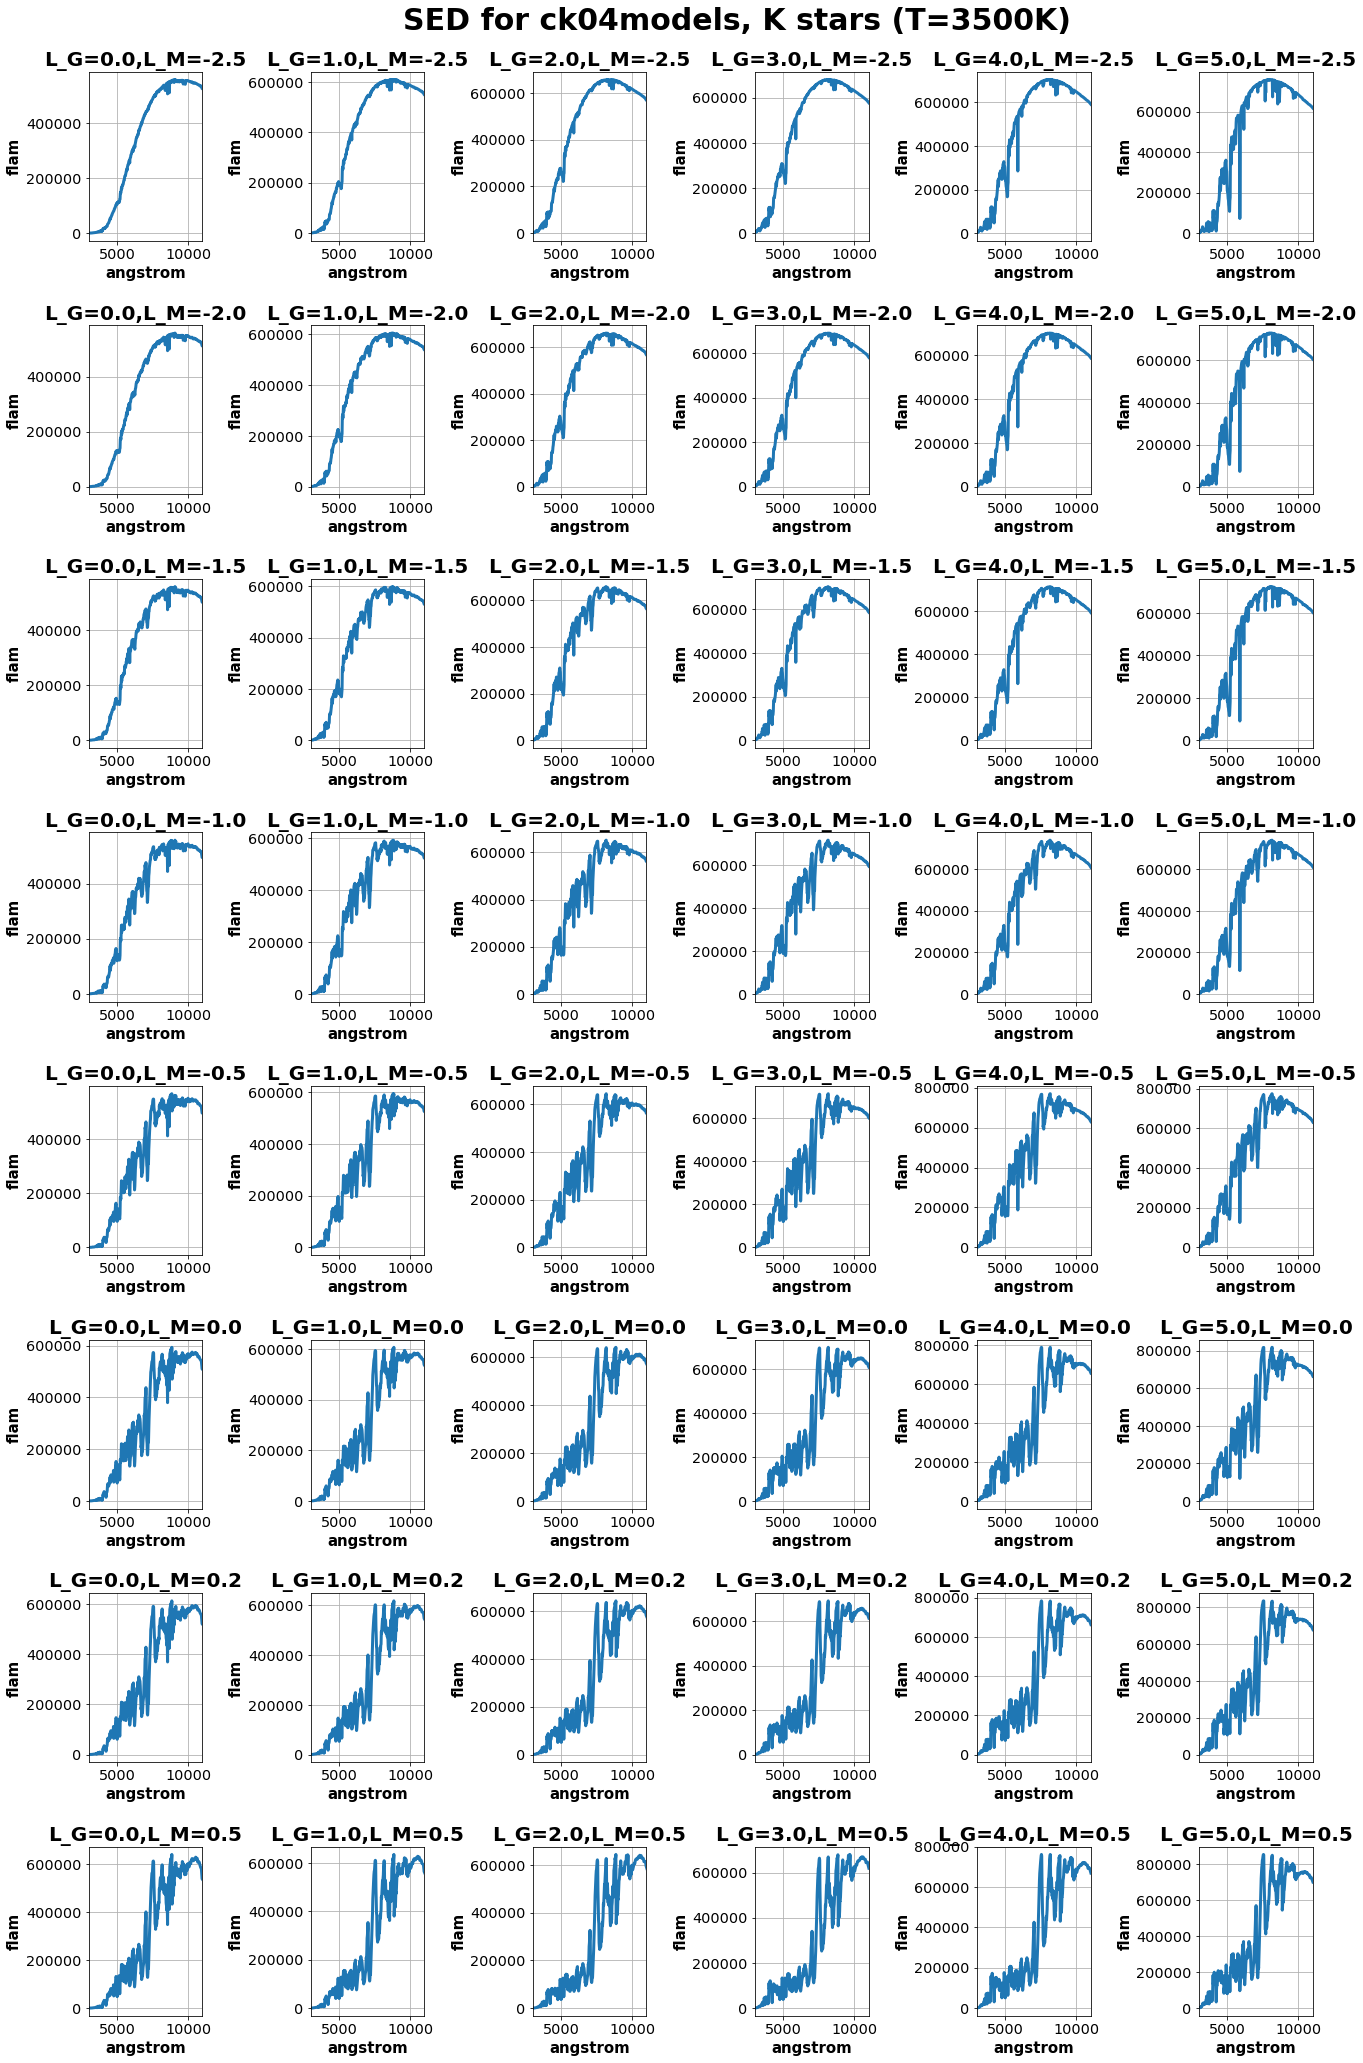

In [45]:
f, axarr = plt.subplots(NY, NX,figsize=(20,30))
f.subplots_adjust(left = 0.05, bottom = 0.05,right = 0.9, top = 0.95, wspace = 0.95, hspace = 0.5)

for iy in np.arange(NY):
    for ix in np.arange(NX):
        log_z=Set_Log_Z[iy]
        log_g=Set_Log_g[ix]
        sed=sed = S.Icat('ck04models', Temperature_of_Star, log_z, log_g) 
        sed.convert('flam') 
        thetitle='L_G={},L_M={}'.format(log_g,log_z)
        axarr[iy, ix].plot(sed.wave,sed.flux,lw=3)
        axarr[iy, ix].set_xlabel(sed.waveunits,fontsize=15, fontweight='bold')
        axarr[iy, ix].set_ylabel(sed.fluxunits,fontsize=15, fontweight='bold')
        axarr[iy, ix].set_title(thetitle,fontsize=20, fontweight='bold')
        axarr[iy, ix].grid(True)
        axarr[iy, ix].set_xlim(XMIN,XMAX)
        
f.suptitle("SED for ck04models, K stars (T=3500K)", fontsize=30, fontweight='bold')        
plt.savefig("all_SED_ck04models_Kstar.png")
        
